In [1]:
import pickle
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import seaborn as sns
import momepy
from shapely.geometry import Point

/home/twenty/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Delhi

## Roads

In [2]:
df = gpd.read_file('data/india/overpass/export.geojson')

In [3]:
# reproject to pseudo mercator where units are in meters
df.geometry = df.geometry.to_crs(3857)

In [4]:
#https://networkx.org/documentation/latest/auto_examples/geospatial/plot_lines.html#sphx-glr-auto-examples-geospatial-plot-lines-py
G = momepy.gdf_to_nx(df, approach="primal")

In [5]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

In [6]:
df1 = pd.DataFrame(data=pd.Series(node_centrality), columns=['cc'])
df1['colors'] = ox.plot.get_colors(n=len(df1), cmap='inferno', start=0.2)
df1.reset_index(inplace=True)
df1.rename(columns={'level_0': 'x', 'level_1': 'y'}, inplace=True)
df1

,x,y,cc,colors
0,8.659371e+06,3.323996e+06,0.000274,"(0.258234, 0.038571, 0.406485, 1.0)"
1,8.633455e+06,3.336231e+06,0.000319,"(0.258234, 0.038571, 0.406485, 1.0)"
2,8.597384e+06,3.333723e+06,0.008047,"(0.258234, 0.038571, 0.406485, 1.0)"
3,8.597132e+06,3.334876e+06,0.007951,"(0.258234, 0.038571, 0.406485, 1.0)"
4,8.588163e+06,3.324410e+06,0.008021,"(0.258234, 0.038571, 0.406485, 1.0)"
...,...,...,...,...
6735,8.637703e+06,3.331171e+06,0.000497,"(0.988362, 0.998364, 0.644924, 1.0)"
6736,8.637672e+06,3.331154e+06,0.000465,"(0.988362, 0.998364, 0.644924, 1.0)"
6737,8.639184e+06,3.330544e+06,0.000319,"(0.988362, 0.998364, 0.644924, 1.0)"
6738,8.654600e+06,3.326576e+06,0.000274,"(0.988362, 0.998364, 0.644924, 1.0)"


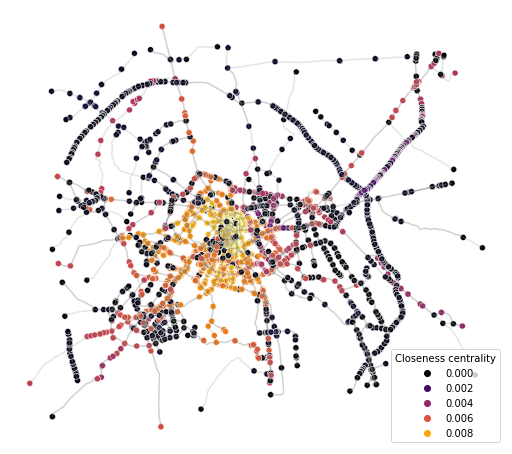

In [13]:
_, ax = plt.subplots(figsize=(10, 7))
# this draws weird loops for some reason
#nx.draw_networkx_edges(G, pos={(row.x, row.y): (row.x, row.y) for _, row in df1.iterrows()}, ax=ax)
df.plot(ax=ax, color='grey', alpha=0.2)
sns.scatterplot(x=df1.x, y=df1.y, hue=df1.cc, palette='inferno', ax=ax)
plt.tight_layout()
plt.axis('off')
ax.legend(title='Closeness centrality')
plt.savefig('cc.png')